# Imports

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Functions

In [2]:
def rep_hill(x, K = 2.5, n = 5, beta = 5):
    return beta * K ** n / (K ** n + x ** n)

def act_hill(x, K = 2.5, n = 5, beta = 5):
    return beta * x ** n / (K ** n + x ** n)

def negative_feedback_loop(u, t, alfa, beta_x, beta_y, K, n):
    x,y = u
    
    dxdt = rep_hill(y, K, n, beta_x) - alfa * x
    dydt = act_hill(x, K, n, beta_y) - alfa * y
    return dxdt, dydt

def positive_step_func(x, K, beta):
    if x > K:
        return beta
    else:
        return 0
    
def negative_step_func(x, K, beta):
    if x < K:
        return beta
    
    else:
        return 0

def negative_lin_fbl(u, t, alfa, beta_x, beta_y, K, n):
    x,y = u
    
    dxdt = negative_step_func(y, K, beta) - alfa * x
    dydt = positive_step_func(x, K, beta) - alfa * y
    return dxdt, dydt

# Conditions

In [3]:
start, stop = (0,6)
t = np.linspace(start,stop)
n = 5
alfa = 1
beta_x = 5
beta_y = 5
K = 2.5
u0_1 = [4.5,4]
u0_2 = [4,4.5]
u0_3 = [1, 0.5]
u0_4 = [0.5, 1]

# Solve and plot

Text(0, 0.5, 'Y')

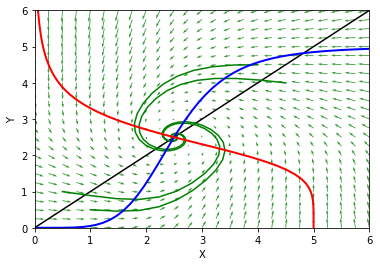

In [4]:
negative_feedback_loop# Solving for different starting points
u_1 = odeint(negative_feedback_loop, u0_1, t, (alfa, beta_x, beta_y, K, n))
u_2 = odeint(negative_feedback_loop, u0_2, t, (alfa, beta_x, beta_y, K, n))
u_3 = odeint(negative_feedback_loop, u0_3, t, (alfa, beta_x, beta_y, K, n))
u_4 = odeint(negative_feedback_loop, u0_4, t, (alfa, beta_x, beta_y, K, n))


# Hill function values
X_x_axis_hill = list(np.linspace(start,stop))
X_y_axis_hill = list(map(act_hill, X_x_axis_hill))

Y_y_axis_hill = list(np.linspace(start,stop))
Y_x_axis_hill = list(map(rep_hill, Y_y_axis_hill))

# NEED STEADY STATES


# Line that separates states
mid_line_x = list(np.linspace(start,stop))
mid_line_y = list(np.linspace(start,stop))

# Gradients and their coordinates
x_coords = np.linspace(start, stop, num = 25)
y_coords = np.linspace(start, stop, num = 25)

x_gradients = np.array([[rep_hill(y) - alfa * x for x in x_coords] for y in y_coords])
y_gradients = np.array([[act_hill(x) - alfa * y for x in x_coords] for y in y_coords])

# Plotting
plt.quiver(x_coords, y_coords, x_gradients, y_gradients, alpha = 0.8, color='g')
plt.plot(mid_line_x, mid_line_y, 'k')
plt.xlim(start, stop)
plt.ylim(start, stop)
plt.plot(u_1[:,0], u_1[:,1], 'g-')
plt.plot(u_2[:,0], u_2[:,1], 'g-')
plt.plot(u_3[:,0], u_3[:,1], 'g-')
plt.plot(u_4[:,0], u_4[:,1], 'g-')
plt.plot(X_x_axis_hill, X_y_axis_hill, 'b-', linewidth=2, label='x')
plt.plot(Y_x_axis_hill, Y_y_axis_hill, 'r-', linewidth=2, label='y')
plt.xlabel('X')
plt.ylabel('Y')

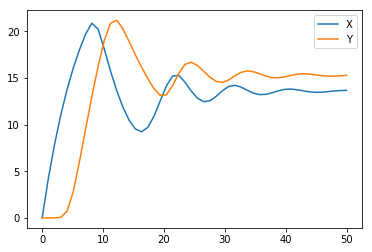

In [5]:
def oscillation_model(u, t, alfa_x, alfa_y, beta_x, beta_y, K, n):
    x,y = u
    
    dxdt = rep_hill(y, K, n, beta_x) - alfa_x * x
    dydt = act_hill(x, K, n, beta_y) - alfa_y * y
    return dxdt, dydt


n = 10
K = 15
t = np.linspace(0,50)

u = odeint(oscillation_model, [0,0], t, (0.15, 0.08, 4.5, 4.5, K, n))

plt.plot(t, u[:,0], label='X')
plt.plot(t, u[:,1], label='Y')
plt.legend()

# Linearized model: solving and plots

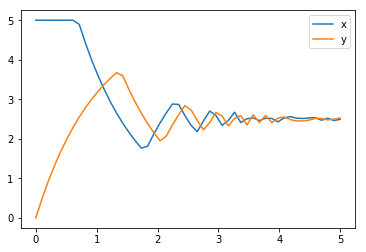

In [6]:
def step_func(x, K, act=False):
    if x > K and act or x < K and not act:
        return 1
    else:
        return 0
    
def linearized_oscillator(u, t, alfa, beta, K):
    x,y = u
    
    dxdt = beta * step_func(y, K) - alfa * x
    dydt = beta * step_func(x, K, True) - alfa * y
    return dxdt, dydt


u0 = [5,0]
t = np.linspace(0,5)
alfa = 1
beta = 5
K = 2.5

u = odeint(linearized_oscillator, u0, t, (alfa, beta, K))
plt.plot(t, u[:,0], label='x')
plt.plot(t, u[:,1], label='y')
plt.legend()


# Repressilator

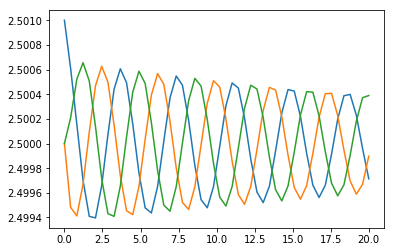

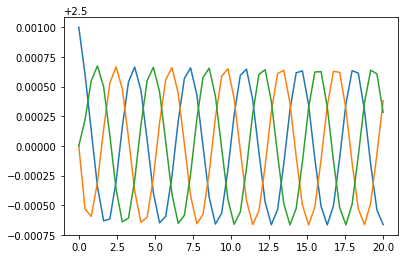

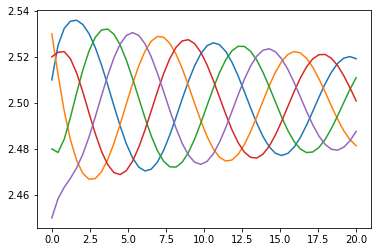

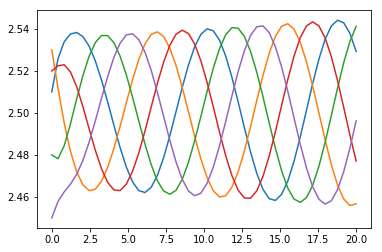

In [7]:
def hill(x, K, n, act=False):
    if act==True:
        return x ** n / (K ** n + x ** n)
    else:
        return K ** n / (K ** n + x ** n)

def repressilator(u, t, alfa, beta, K, n):
    dudt = np.zeros_like(u)
    dudt[0] = beta * hill(u[-1], K, n) - alfa * u[0]

    for i in range(len(u)):
        dudt[i] = beta * hill(u[i-1], K, n) - alfa * u[i]
    return dudt


def plot(t, u):
    for i in range(len(u[0])):
        plt.plot(t, u[:,i])
    plt.show()

t = np.linspace(0,20)
beta = 5
alfa = 1
n = 3.9
K = 2.5
u0 = [2.501,2.5,2.5]

u = odeint(repressilator, u0, t, (alfa, beta, K, n))

plot(t, u)

n = 4
u = odeint(repressilator, u0, t, (alfa, beta, K, n))

plot(t, u)

n = 2.4
u0 = [2.51, 2.53, 2.48, 2.52,2.45]
u = odeint(repressilator, u0, t, (alfa, beta, K, n))

plot(t, u)

n = 2.5
u0 = [2.51, 2.53, 2.48, 2.52,2.45]
u = odeint(repressilator, u0, t, (alfa, beta, K, n))

plot(t, u)


# Comments
The cooperativity required for sustained oscillations decreases with the increase in number of transcription factors.
An approximate threshold for cooperativity with three transcription factors and current parameter configurations is 4.
For five transcription factors, the hill coefficient needs to be approximately 2.5.